<a href="https://www.kaggle.com/code/lakshmipriya190803/logistic-svm-nb-rf-xgb-cb-lightgbm?scriptVersionId=158279028" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Welcome :)

This notebook is beginner friendly and covers various aspects of the Machine Learning domain. Playground Series are meant for learning, and here I will be trying the various tools that are avaible. I will also be explaining some of the tools and algorithms that I will be using along with diagrams if possible, if you find my notebook please vote and comment. Happy learning :) 

#### Importing Necessary Libraries

I'm also going to use sklearnex which is an Intel® Extension for Scikit-learn* is a free software AI accelerator that brings over 10-100X acceleration across a variety of applications.

In [1]:
# !nvidia-smi

In [2]:
#import cudf

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearnex import patch_sklearn 
patch_sklearn()
from sklearn.svm import SVC 

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Exploratory Data Analysis

Lets explore the data to find out the patterns lying in the data

Our goal is to correctly classify whether a person has "Exited" or "Not Exited"

In [4]:
df = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
df.head(5)

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
print("Lets see whether the dataset contains NaN values or not: ")
df.isnull().sum()

Lets see whether the dataset contains NaN values or not: 


id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Lets drop the CustomerId , id, and Surname since they are of no use

In [7]:
#X = df.drop(df['id', 'CustomerId', 'Surname'])
X = df.drop(['id', 'CustomerId', 'Surname'], axis=1)
X.head(5)

CreditScore Geography Gender   Age  Tenure    Balance  NumOfProducts  \
0          668    France   Male  33.0       3       0.00              2   
1          627    France   Male  33.0       1       0.00              2   
2          678    France   Male  40.0      10       0.00              2   
3          581    France   Male  34.0       2  148882.54              1   
4          716     Spain   Male  33.0       5       0.00              2   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0        1.0             0.0        181449.97       0  
1        1.0             1.0         49503.50       0  
2        1.0             0.0        184866.69       0  
3        1.0             1.0         84560.88       0  
4        1.0             1.0         15068.83       0

Encode Categorical data : Geography and Gender

In [8]:
le = LabelEncoder()
X['Geography'] = le.fit_transform(X['Geography'])
X['Gender'] = le.fit_transform(X['Gender'])
X.head(5)

CreditScore  Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0          668          0       1  33.0       3       0.00              2   
1          627          0       1  33.0       1       0.00              2   
2          678          0       1  40.0      10       0.00              2   
3          581          0       1  34.0       2  148882.54              1   
4          716          2       1  33.0       5       0.00              2   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0        1.0             0.0        181449.97       0  
1        1.0             1.0         49503.50       0  
2        1.0             0.0        184866.69       0  
3        1.0             1.0         84560.88       0  
4        1.0             1.0         15068.83       0

In [9]:
y = X['Exited']
X = X.drop(['Exited'], axis = 1)

In [10]:
col = df['Exited'].to_numpy()
classes, class_counts = np.unique(col , return_counts = True)
classes, class_counts

(array([0, 1]), array([130113,  34921]))

### Exploring the distributions and making necessary changes

#### Class Distribution : 

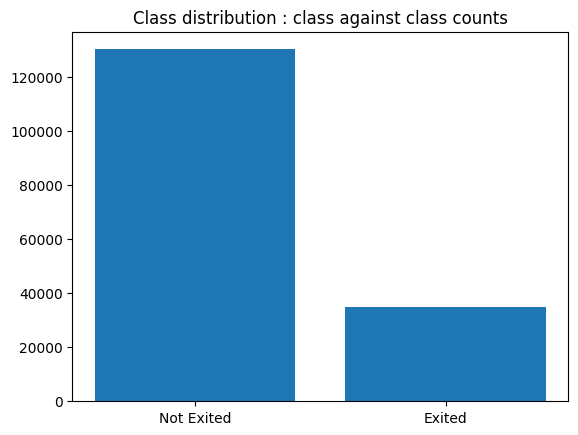

In [11]:
plt.title("Class distribution : class against class counts")
plt.bar(classes, class_counts)
plt.xticks([0,1], ['Not Exited', 'Exited'])
plt.show()

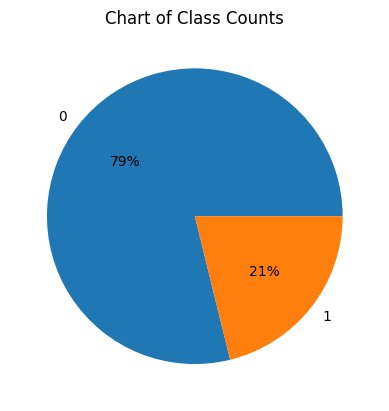

In [12]:
plt.title("Chart of Class Counts")
plt.pie(class_counts, labels = classes, autopct = '%1.0f%%')
plt.show()

##### Classes are imbalanced

The class imbalance is relatively high. Class 1: Exited only forms 21% of the training data.

I am going to use the following methods to create different datasets that are balanced and then perform machine learning on both, whichever gives higher precision and recall, will be chosen.

1. Undersampling
2. Oversampling (SMOTE)

#### Undersampling

Undersampling is a technique used to address class imbalance by reducing the number of samples in the majority class to create a more balanced dataset. The idea is to randomly select a subset of the majority class samples so that the ratio between the minority and majority classes becomes more balanced.

Since we know that class 0 has high amount of samples forming the majority class, we will randomly select a subset of samples from this for removal.

In [13]:
rus = RandomUnderSampler(random_state = 42)
X_undersampled , y_undersampled = rus.fit_resample(X, y)

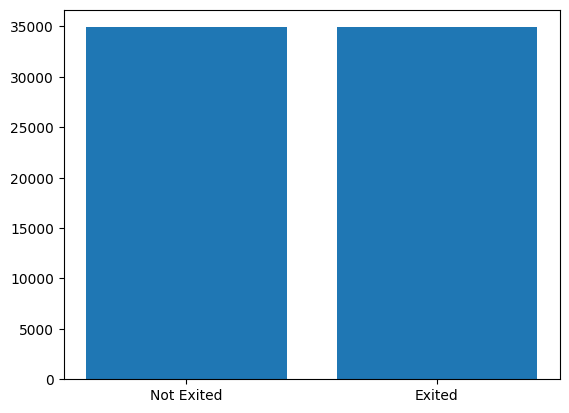

In [14]:
classes_under, class_counts_under = np.unique(y_undersampled.to_numpy(), return_counts = True)
plt.bar(classes_under, class_counts_under)
plt.xticks([0,1], ['Not Exited', 'Exited'])
plt.show()

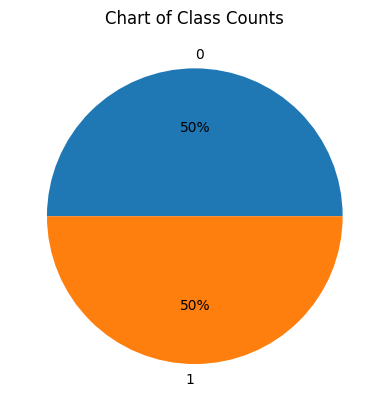

In [15]:
plt.title("Chart of Class Counts")
plt.pie(class_counts_under, labels = classes_under, autopct = '%1.0f%%')
plt.show()

#### Oversampling (SMOTE)

SMOTE = Synthetic Minority Over-sampling Technique

SMOTE generates synthetic samples for the minority class by interpolating new points between existing ones. For each sample in the minority class, it selects k nearest neighbors from the same class. It then selects one of these k neighbors at random and computes the difference between the feature vector of the original sample and the selected neighbor. It multiplies this difference by a random number between 0 and 1 and adds it to the feature vector of the original sample.

When we use Smote we do not lose information since this method does not remove any sample. It reduces the risk of overfitting because it generates synthetic samples that are not identical to the original samples.

On the other hand, SMOTE generates synthetic samples, which can introduce noise and outliers in the data. If the dataset is large, then applying SMOTE can be costly.

SMOTE is particularly useful when the class imbalance is severe and the minority class is significantly underrepresented. It is also useful when there is limited data available for the minority class, as it can create additional synthetic samples to improve model performance.

So in our case,

* class 1 is the minority class in the dataset, 
* we will be randomly select one sample
* for that selected sample we will identify nearest neighbours
* create synthetic samples by selecting random points along the line segments connecting the chosen sample with its nearest neighbours
* add the synthetic samples to minority class

In [16]:
sm = SMOTE(random_state = 42)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.NearestNeighbors.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.NearestNeighbors.kneighbors: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


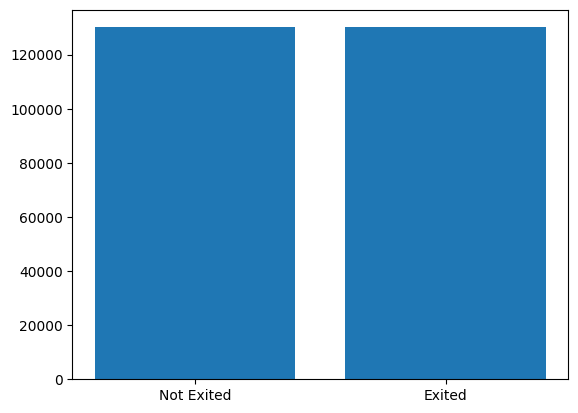

In [17]:
classes_over, class_counts_over = np.unique(y_SMOTE.to_numpy(), return_counts = True)
plt.bar(classes_over, class_counts_over)
plt.xticks([0,1], ['Not Exited', 'Exited'])
plt.show()

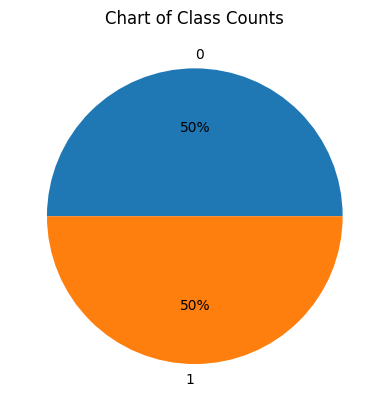

In [18]:
plt.title("Chart of Class Counts")
plt.pie(class_counts_over, labels = classes_over, autopct = '%1.0f%%')
plt.show()

#### Features Distribution

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  int64  
 2   Gender           165034 non-null  int64  
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 12.6 MB


[Text(0.5, 0, 'Estimated Salary')]

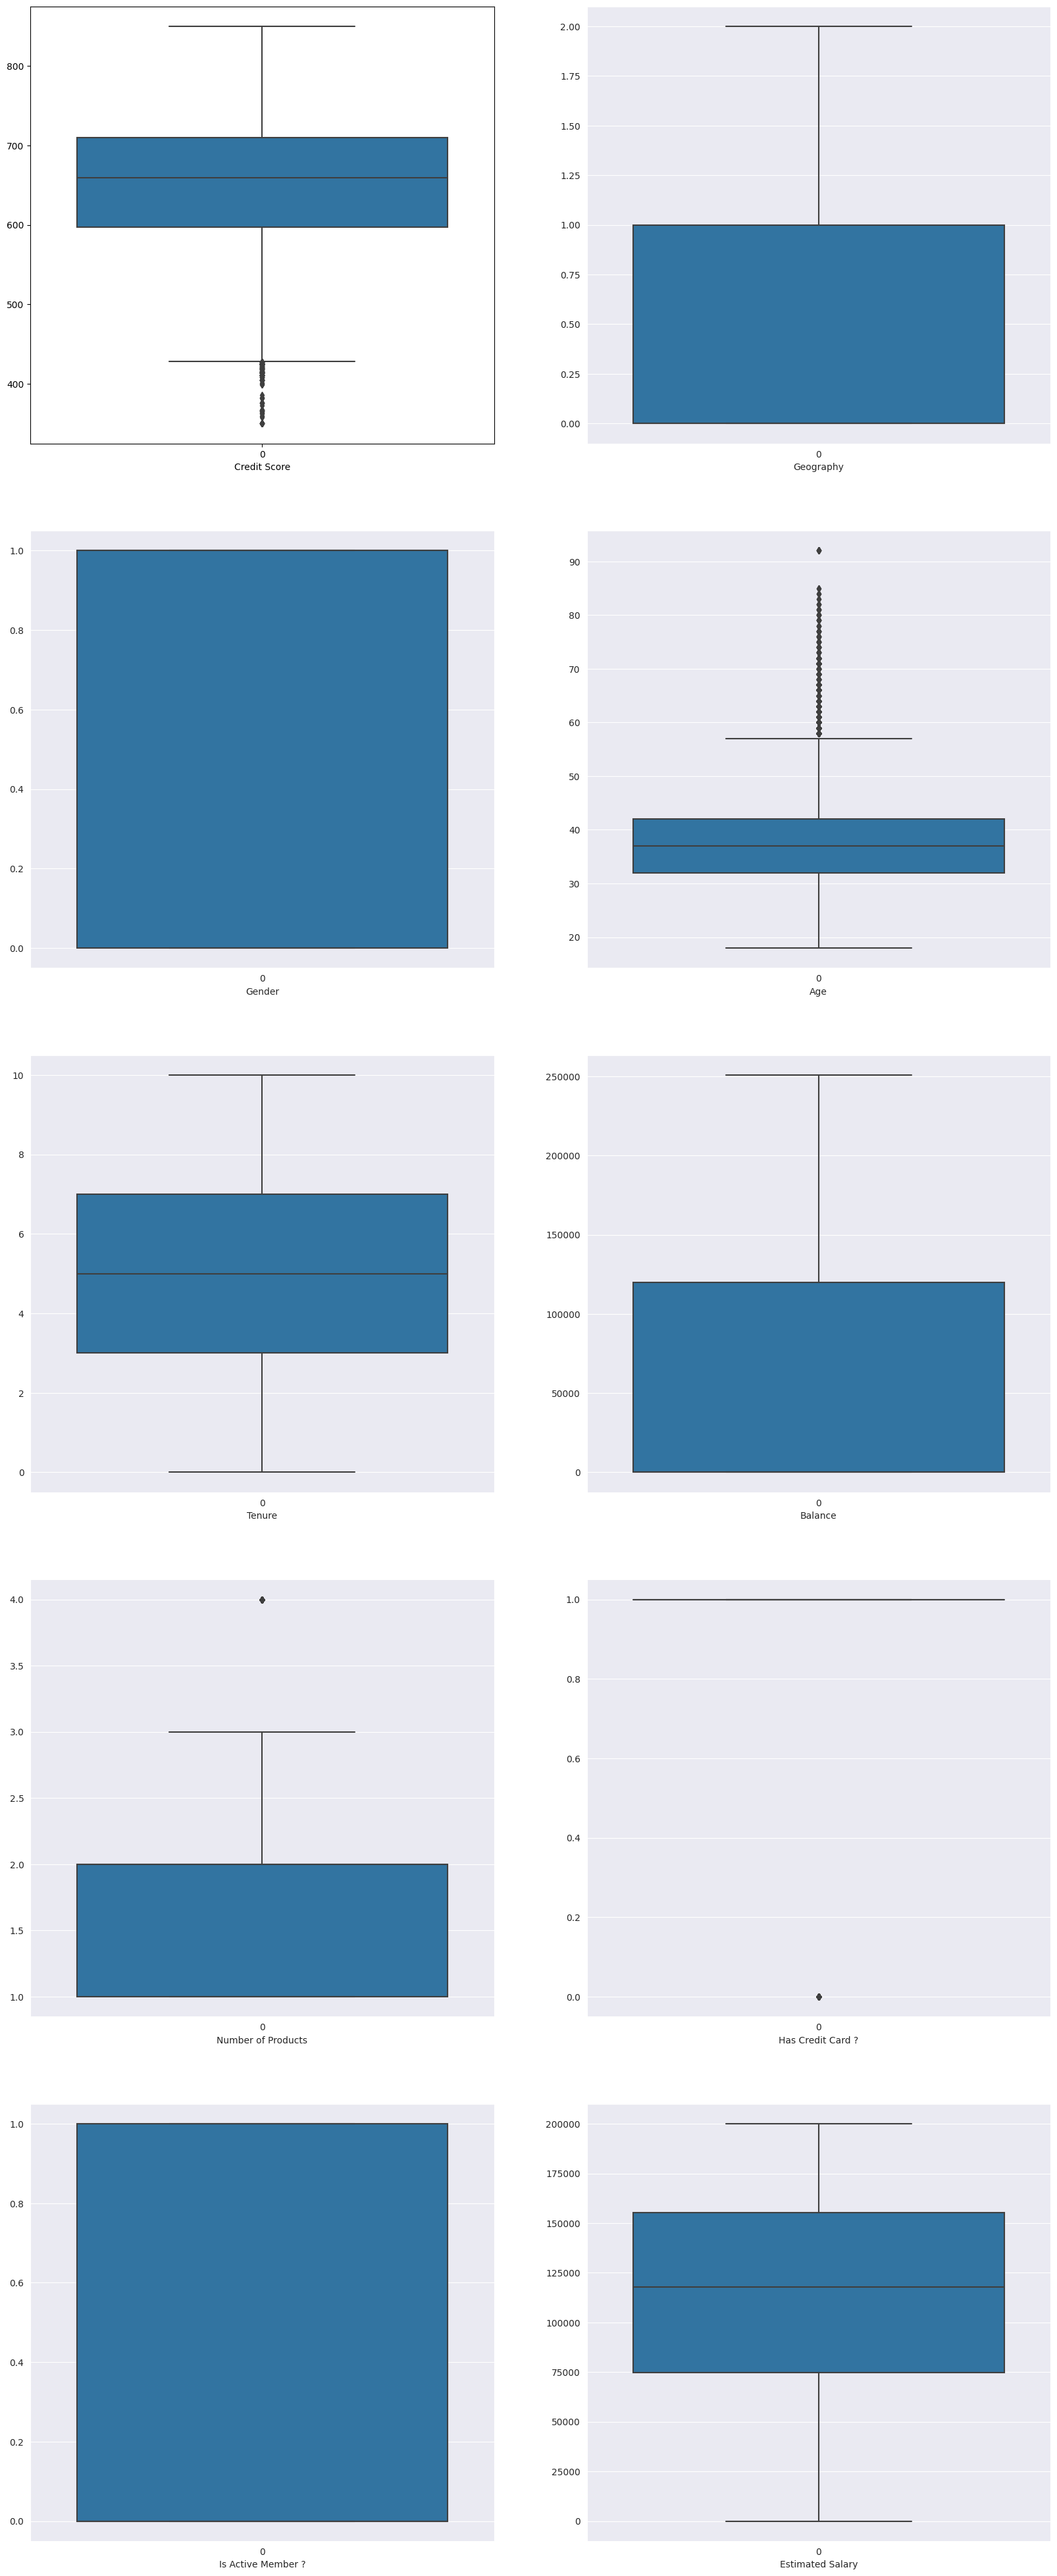

In [20]:
plt.figure(figsize=(20,50))
plt.subplot(5, 2, 1)
sns.set_style('darkgrid')
sns.boxplot(data = X['CreditScore']).set(xlabel='Credit Score')

plt.subplot(5, 2, 2)
sns.set_style('darkgrid')
sns.boxplot(data = X['Geography']).set(xlabel='Geography')

plt.subplot(5, 2, 3)
sns.set_style('darkgrid')
sns.boxplot(data = X['Gender']).set(xlabel='Gender')

plt.subplot(5, 2, 4)
sns.set_style('darkgrid')
sns.boxplot(data = X['Age']).set(xlabel='Age')

plt.subplot(5, 2, 5)
sns.set_style('darkgrid')
sns.boxplot(data = X['Tenure']).set(xlabel='Tenure')

plt.subplot(5, 2, 6)
sns.set_style('darkgrid')
sns.boxplot(data = X['Balance']).set(xlabel='Balance')

plt.subplot(5, 2, 7)
sns.set_style('darkgrid')
sns.boxplot(data = X['NumOfProducts']).set(xlabel='Number of Products')

plt.subplot(5, 2,8)
sns.set_style('darkgrid')
sns.boxplot(data = X['HasCrCard']).set(xlabel='Has Credit Card ?')

plt.subplot(5, 2, 9)
sns.set_style('darkgrid')
sns.boxplot(data = X['IsActiveMember']).set(xlabel='Is Active Member ?')

plt.subplot(5, 2, 10)
sns.set_style('darkgrid')
sns.boxplot(data = X['EstimatedSalary']).set(xlabel='Estimated Salary')


Text(0.5, 0, 'Estimated Salary')

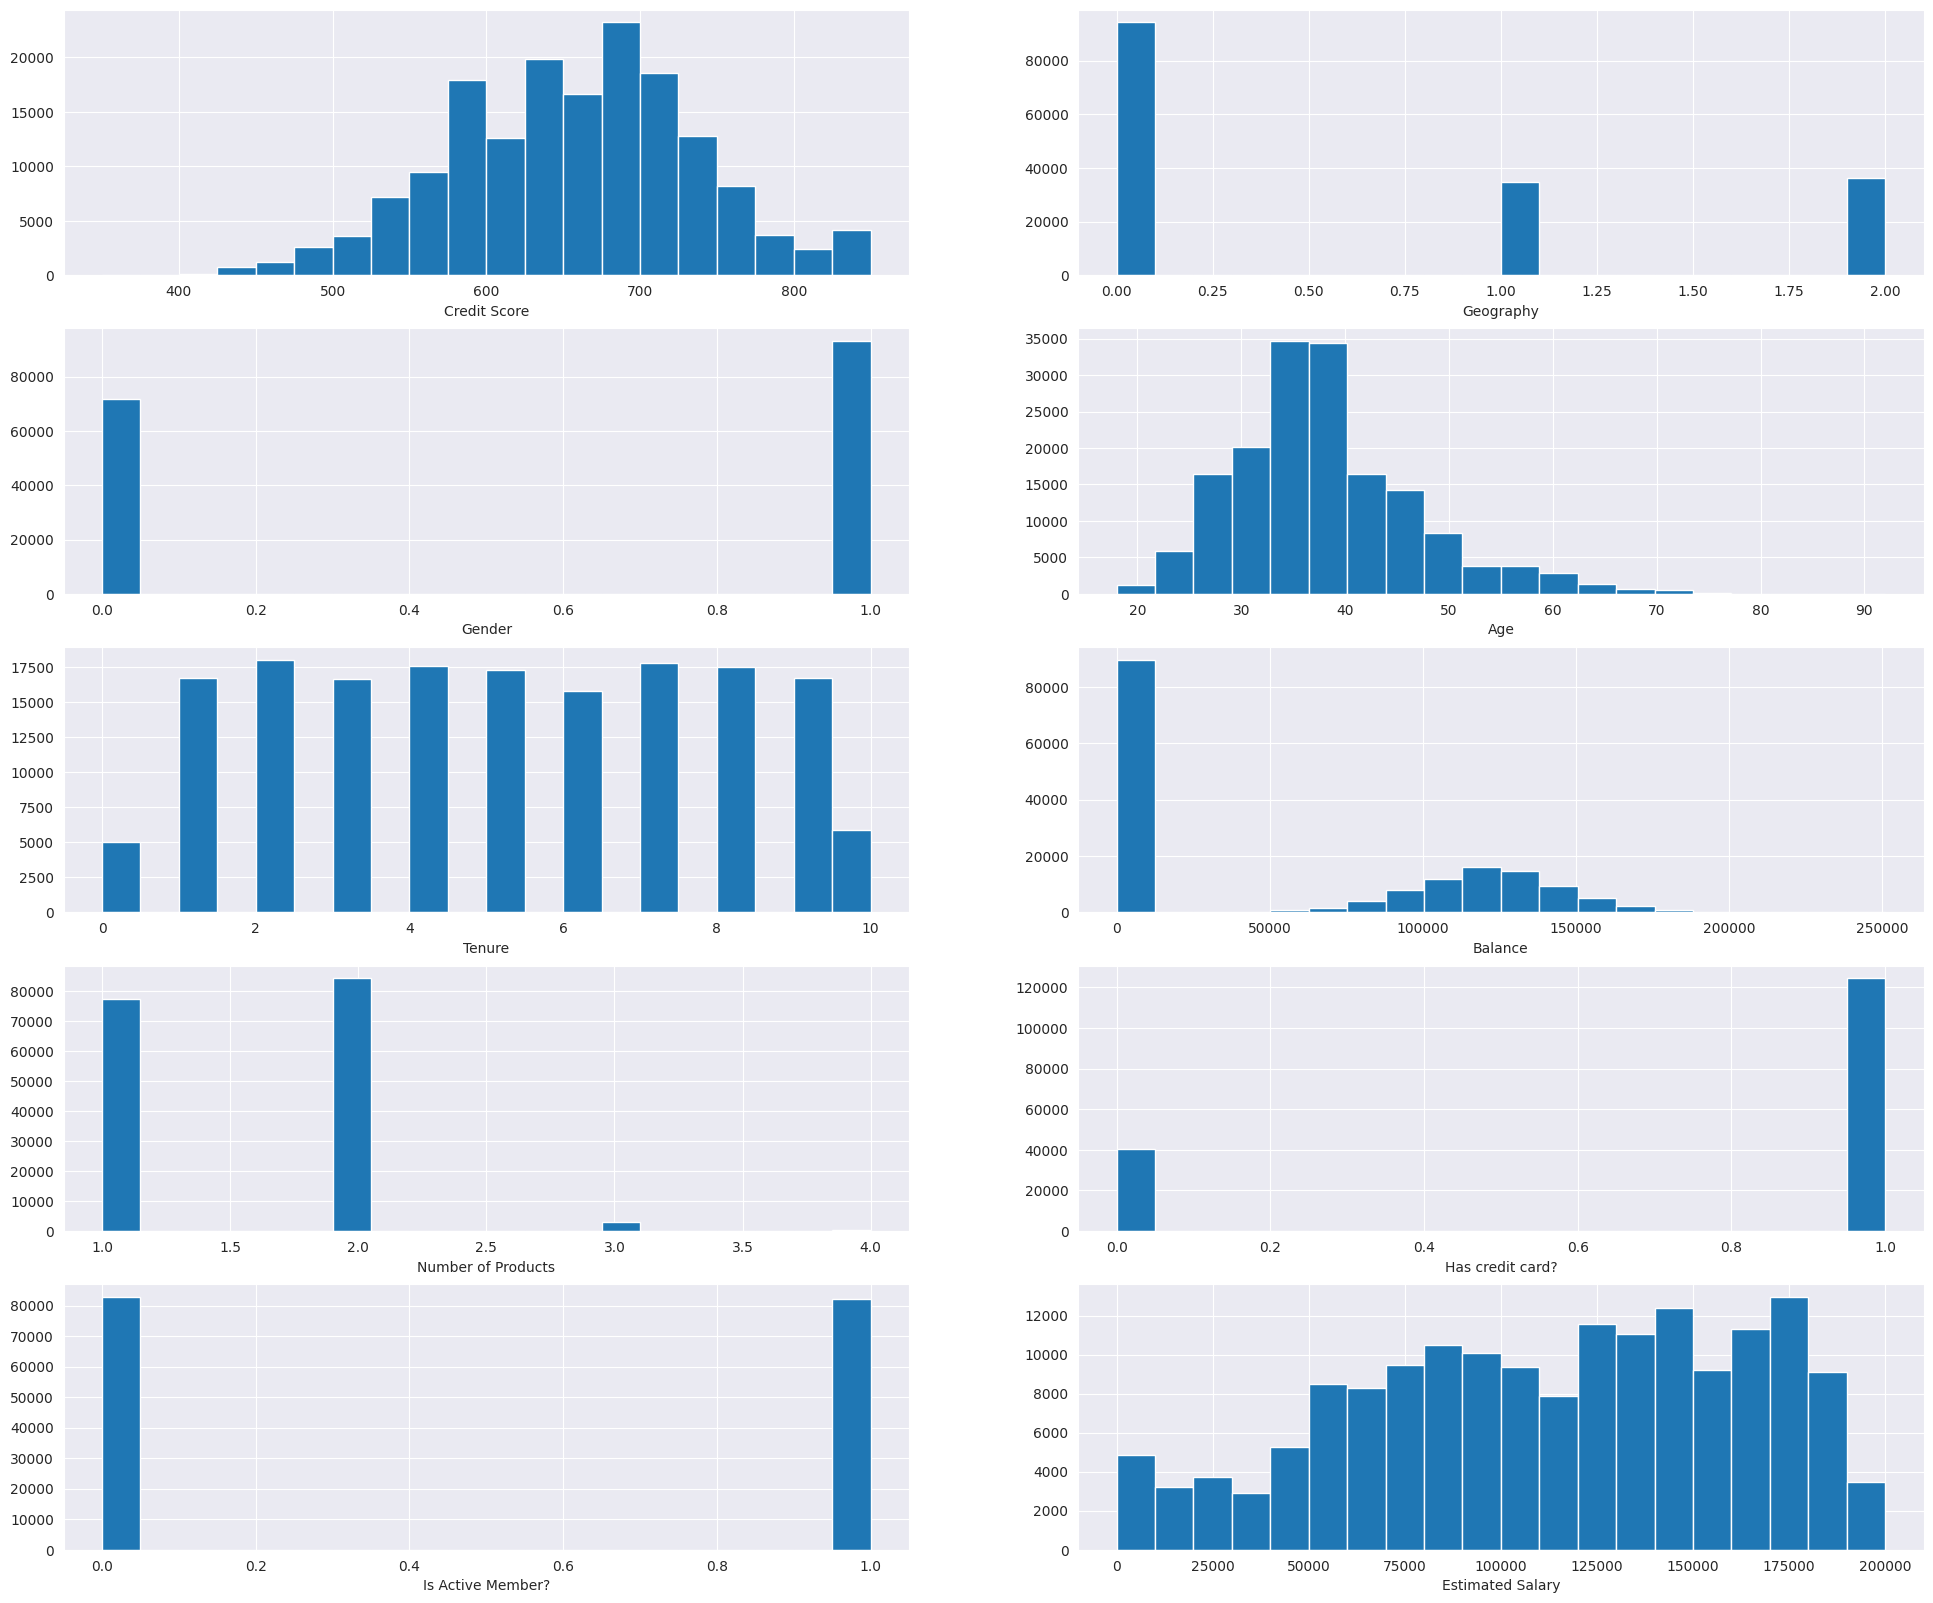

In [21]:
plt.figure(figsize=(24,20))


plt.subplot(5, 2, 1)
fig = X['CreditScore'].hist(bins=20)
fig.set_xlabel('Credit Score')

plt.subplot(5, 2, 2)
fig = X['Geography'].hist(bins=20)
fig.set_xlabel('Geography')

plt.subplot(5, 2, 3)
fig = X['Gender'].hist(bins=20)
fig.set_xlabel('Gender')

plt.subplot(5, 2, 4)
fig = X['Age'].hist(bins=20)
fig.set_xlabel('Age')

plt.subplot(5, 2, 5)
fig = X['Tenure'].hist(bins=20)
fig.set_xlabel('Tenure')

plt.subplot(5, 2, 6)
fig = X['Balance'].hist(bins=20)
fig.set_xlabel('Balance')

plt.subplot(5, 2, 7)
fig = X['NumOfProducts'].hist(bins=20)
fig.set_xlabel('Number of Products')

plt.subplot(5, 2, 8)
fig = X['HasCrCard'].hist(bins=20)
fig.set_xlabel('Has credit card?')

plt.subplot(5, 2, 9)
fig = X['IsActiveMember'].hist(bins=20)
fig.set_xlabel('Is Active Member?')

plt.subplot(5, 2, 10)
fig = X['EstimatedSalary'].hist(bins=20)
fig.set_xlabel('Estimated Salary')


Upon observing the Distribution of the features, Age and Credit Score distributions are skewed with outliers

### Checking Correlations between features and target perhaps?

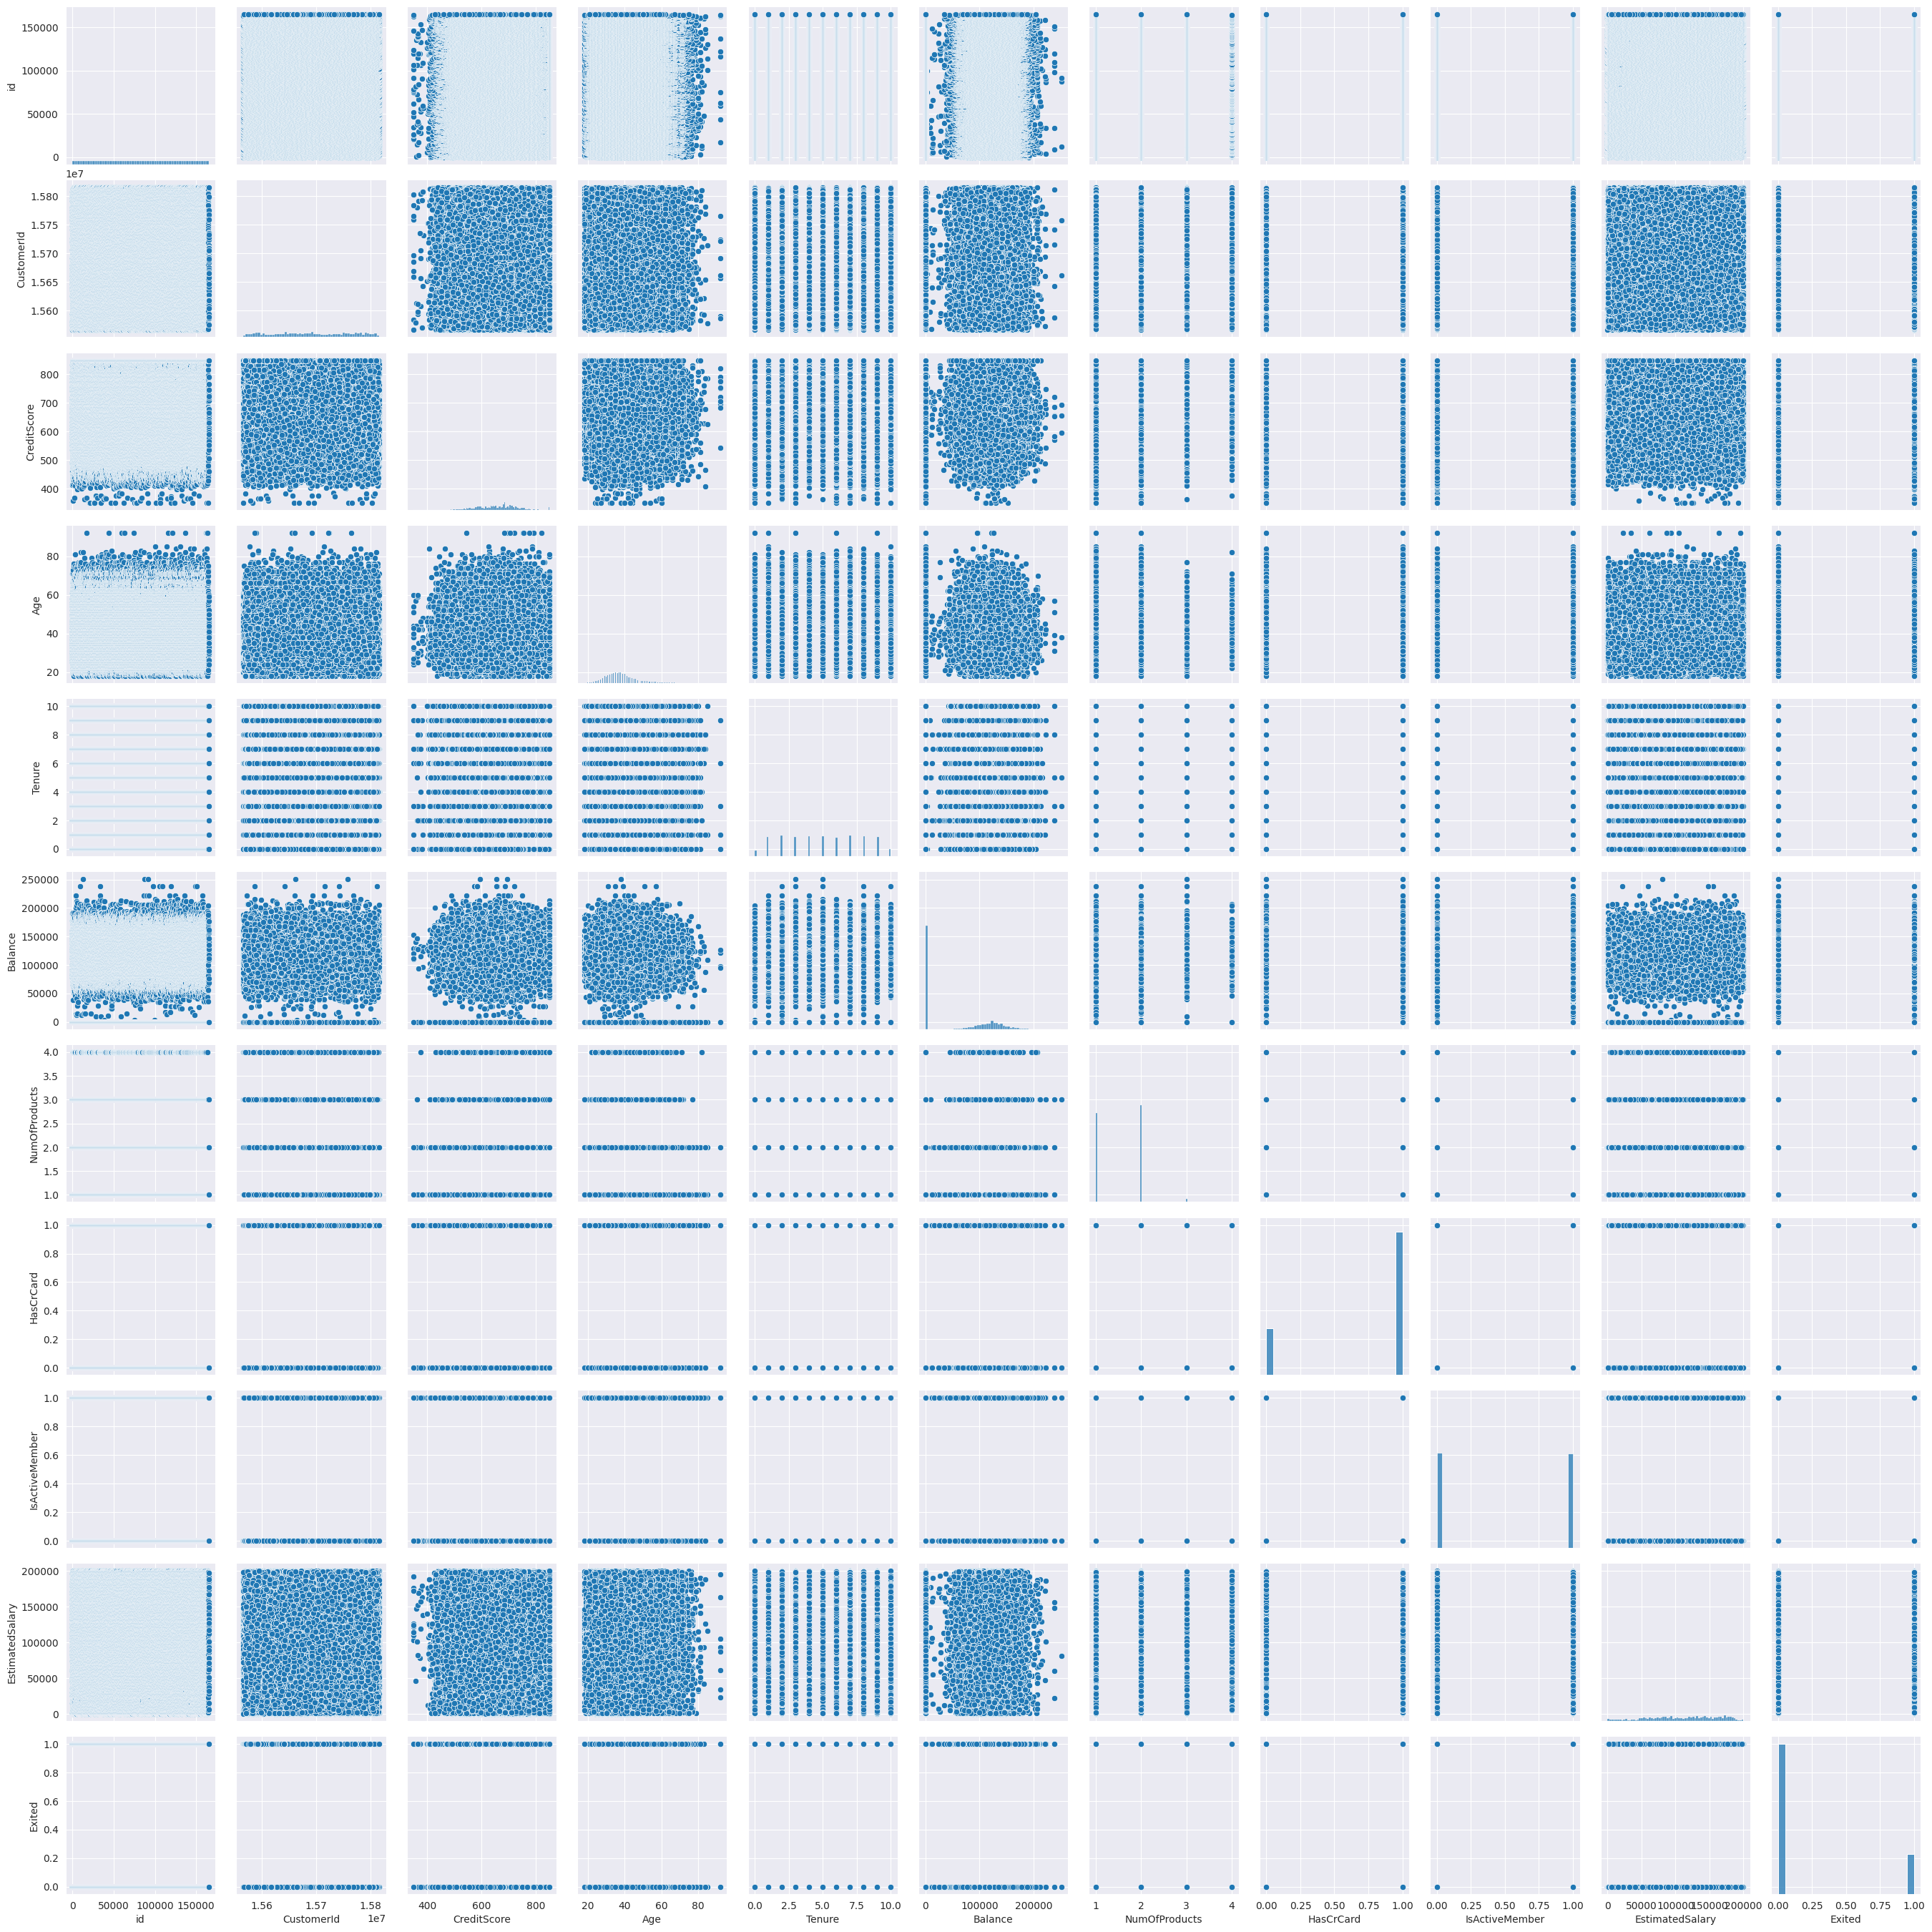

In [22]:
sns.pairplot(df)
plt.show()

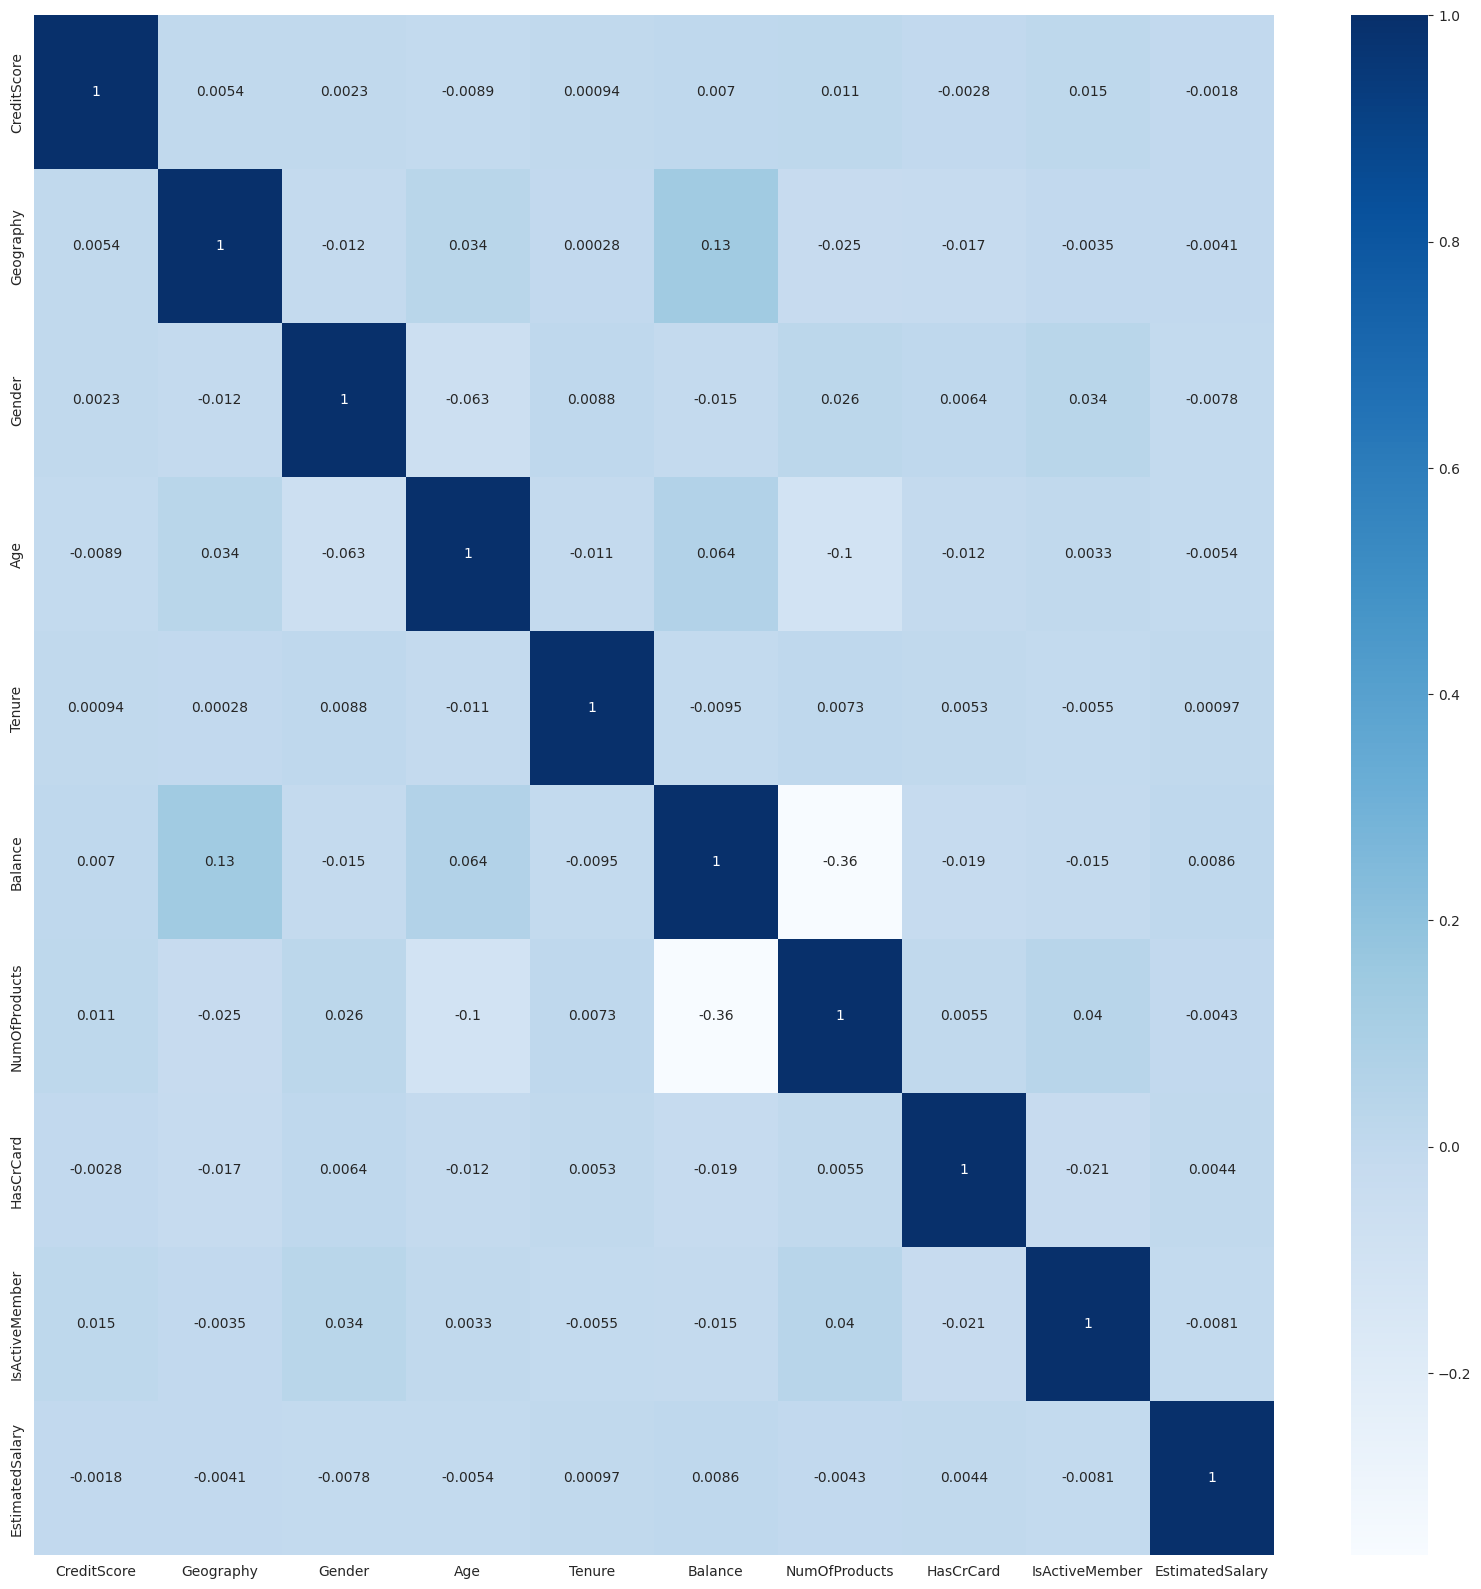

In [23]:
corr = X.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='Blues', annot=True)
plt.show()

The values indicate of the heatmap indicate that there is no strong correlation (may it be positive or negative) between any single feature and df['Excited']

## Machine Learning Approaches : 

1. Logistic Regression
2. SVM
3. Naive Bayes
4. Gradient Boosting Algorithms:
    * XGBoost
    * CatBoost
    * LightGBM

### 1. Logistic Regression 

* Undersampled data : AUC Score = 0.7437074985279536
* Oversampled SMOTE data : AUC Score = 0.7488286727270739

#### Undersampled data

In [24]:
#X_undersampled , y_undersampled
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split (X_undersampled , y_undersampled,
                                                    test_size = 0.2,
                                                     random_state = 42)

lr1 = LogisticRegression()
lr1.fit(X_train_undersampled, y_train_undersampled)
y_pred_undersampled_lr = lr1.predict(X_test_undersampled)

INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU


Lets see how good the model is doing : 

**1.Accuracy :**
Accuracy is a straightforward metric that measures the overall correctness of a model's predictions. It's calculated as the ratio of the number of correct predictions to the total number of predictions made.

**2.Precision :**
Precision focuses on the relevancy of the model's predictions within a specific class. It calculates the ratio of correctly predicted positive observations to the total predicted positive observations, indicating how many of the predicted positive cases were actually positive

**3.Recall (Sensitivity):**
Recall, also known as sensitivity, measures the completeness of the model's predictions for a particular class. It calculates the ratio of correctly predicted positive observations to the total actual positive observations, indicating how many of the actual positive cases were captured by the model.


**ROC - AUC curve:**
The ROC-AUC curve, which stands for Receiver Operating Characteristic - Area Under the Curve, is a graphical representation used to evaluate the performance of a classification model.

Receiver Operating Characteristic (ROC) Curve:

* The ROC curve is a plot that illustrates the performance of a binary classifier at various thresholds. It displays the relationship between the true positive rate (TPR) and the false positive rate (FPR) as the discrimination threshold changes.
* TPR (Sensitivity or Recall): This is the proportion of actual positive cases that are correctly identified by the model.
* FPR (1 - Specificity): This is the proportion of actual negative cases that are incorrectly classified as positive by the model.

Area Under the ROC Curve (AUC):

* AUC represents the area under the ROC curve. It quantifies the model's ability to distinguish between classes.
* A higher AUC score (closer to 1) suggests that the model has better discrimination capability, meaning it can differentiate between positive and negative cases more effectively across various thresholds.
* An AUC of 0.5 indicates that the model performs no better than random guessing, while an AUC of 1 signifies perfect classification.
    


In [25]:
precision_undersampled_lr = precision_score(y_test_undersampled, y_pred_undersampled_lr)
recall_undersampled_lr = recall_score(y_test_undersampled, y_pred_undersampled_lr)
accuracy_undersampled_lr = accuracy_score(y_test_undersampled, y_pred_undersampled_lr)
print(f"Precision : {precision_undersampled_lr}")
print(f"Recall : {recall_undersampled_lr}")
print(f"Accuracy : {accuracy_undersampled_lr}")

Precision : 0.6926064441887226
Recall : 0.6865820618850705
Accuracy : 0.6896699835349703


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict_proba: running accelerated version on CPU


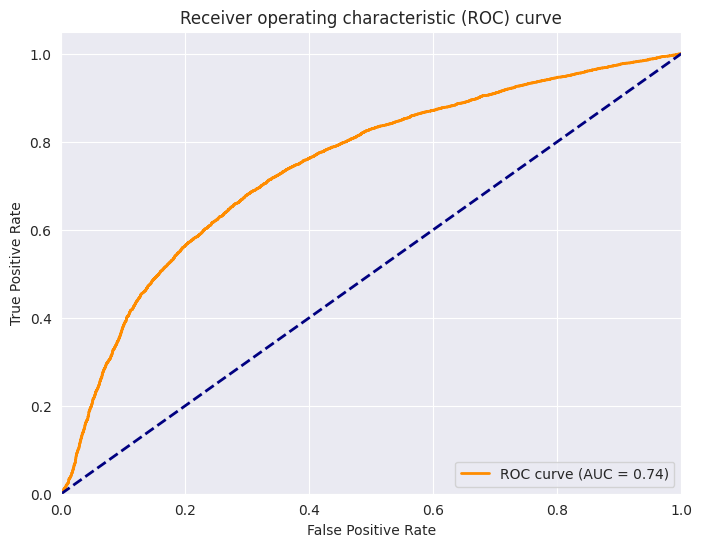

AUC score: 0.7437074985279536


In [26]:
y_pred_prob_undersampled = lr1.predict_proba(X_test_undersampled)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test_undersampled, y_pred_prob_undersampled)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print('AUC score:', roc_auc)

#### Oversampled SMOTE data

In [27]:
#X_SMOTE, y_SMOTE
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split (X_SMOTE , y_SMOTE,
                                                    test_size = 0.2,
                                                     random_state = 42)

lr2 = LogisticRegression()
lr2.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_SMOTE_lr = lr2.predict(X_test_SMOTE)

INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU


In [28]:
precision_SMOTE_lr = precision_score(y_test_SMOTE, y_pred_SMOTE_lr)
recall_SMOTE_lr = recall_score(y_test_SMOTE, y_pred_SMOTE_lr)
accuracy_SMOTE_lr = accuracy_score(y_test_SMOTE, y_pred_SMOTE_lr)
print(f"Precision : {precision_SMOTE_lr}")
print(f"Recall : {recall_SMOTE_lr}")
print(f"Accuracy : {accuracy_SMOTE_lr}")

Precision : 0.5800171995934642
Recall : 0.5698594362086181
Accuracy : 0.5783729777504515


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


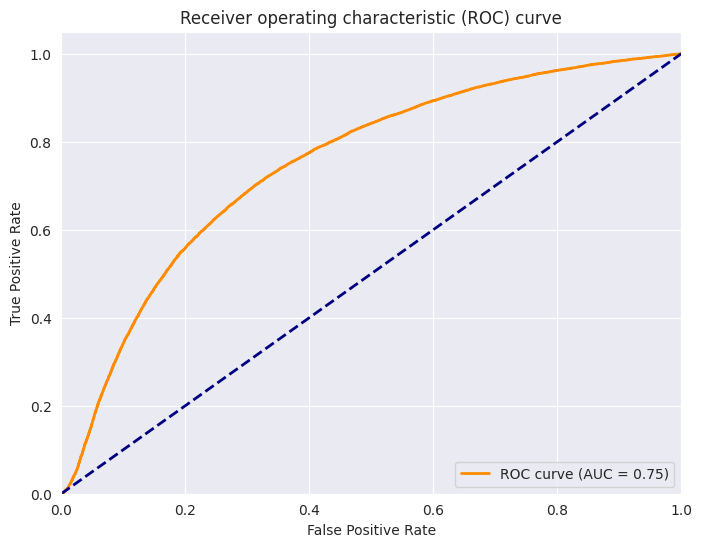

AUC score: 0.7487955671122505


In [29]:
y_pred_prob_SMOTE = lr1.predict_proba(X_test_SMOTE)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test_SMOTE, y_pred_prob_SMOTE)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print('AUC score:', roc_auc)

#### Conclusion

In essence, an AUC score of 0.749 suggests that the logistic regression model has predictive capability better than random chance but might not be exceptionally accurate. 

#### *From now on I will be using the Undersampled Data for the further classifiers*

Please feel free to use the Oversampled data after forking and check if there any major difference and let me know in the comments :)

### SVM

**Support Vector Machines (SVM)** are a type of supervised learning algorithm used for classification and regression tasks. They work by finding the optimal hyperplane that separates data points into different classes or, in the case of regression, predicts the value based on input features. The choice of kernel in SVM determines how the algorithm separates data points in a higher-dimensional space. 

* **SVM with Default Hyperparameters:**
This refers to an SVM model where the hyperparameters are set to default values. The kernel might default to the radial basis function (RBF) or Gaussian kernel, which is a common choice when the data doesn’t naturally fit a linear separation.

Uses: It’s a good starting point for SVM classification problems where you're unsure about the best kernel or parameter values. It can handle both linearly separable and non-linearly separable data but might not optimize performance for specific cases.

* **SVM with Linear Kernel:**
The linear kernel is a simple kernel function that assumes the data is linearly separable. It constructs a decision boundary as a straight line in a lower-dimensional space.

Uses: It's effective when the data can be separated by a straight line or hyperplane. This kernel is efficient for high-dimensional data and works well when the number of features is larger than the number of samples.

* **SVM with Polynomial Kernel:**
The polynomial kernel computes the decision boundary based on polynomial functions of the original features. It maps the data to a higher-dimensional space to find a nonlinear decision boundary.

Uses: It's suitable for cases where the data might be separable by curved or non-linear boundaries. However, the choice of the polynomial degree can significantly impact the model's performance and may require careful tuning.

* **SVM with Sigmoid Kernel:**
The sigmoid kernel is based on the sigmoid function and is capable of handling non-linear decision boundaries.

Uses: It's less commonly used compared to other kernels like linear, polynomial, or RBF. It can be useful in specific cases, but generally, it's not the first choice due to the RBF's versatility in handling non-linearities.

Since our dataset is very large, directly using SVM is costly and we all are impatient af. So, we can consider ensemble method : Bagging (Bootstrap Aggregating) technique that combines multiple models trained on different subsets of the data by creating several subsets of the training data (bootstrap samples), train separate SVM models on each subset, and then combine their predictions (through voting) to make the final prediction.
 
Okay: learning things the hard way
SVM from sklearn is WAYYYY too slow, even when I tried to keep 10,000 estimators (meaning 55 samples per estimator), it was taking HOURS, 

I got this from the sklearn page 😱
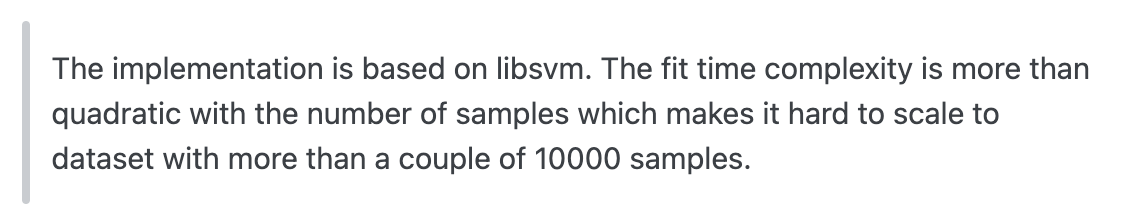


But I ain't giving up on SVM!!
Upon looking up further on the internet I found something really awesome, it works on colab, for some reason the cuml library is not getting imported properly in kaggle notebooks, however, i will be commenting all the codes in this section, feel free to try them out :)

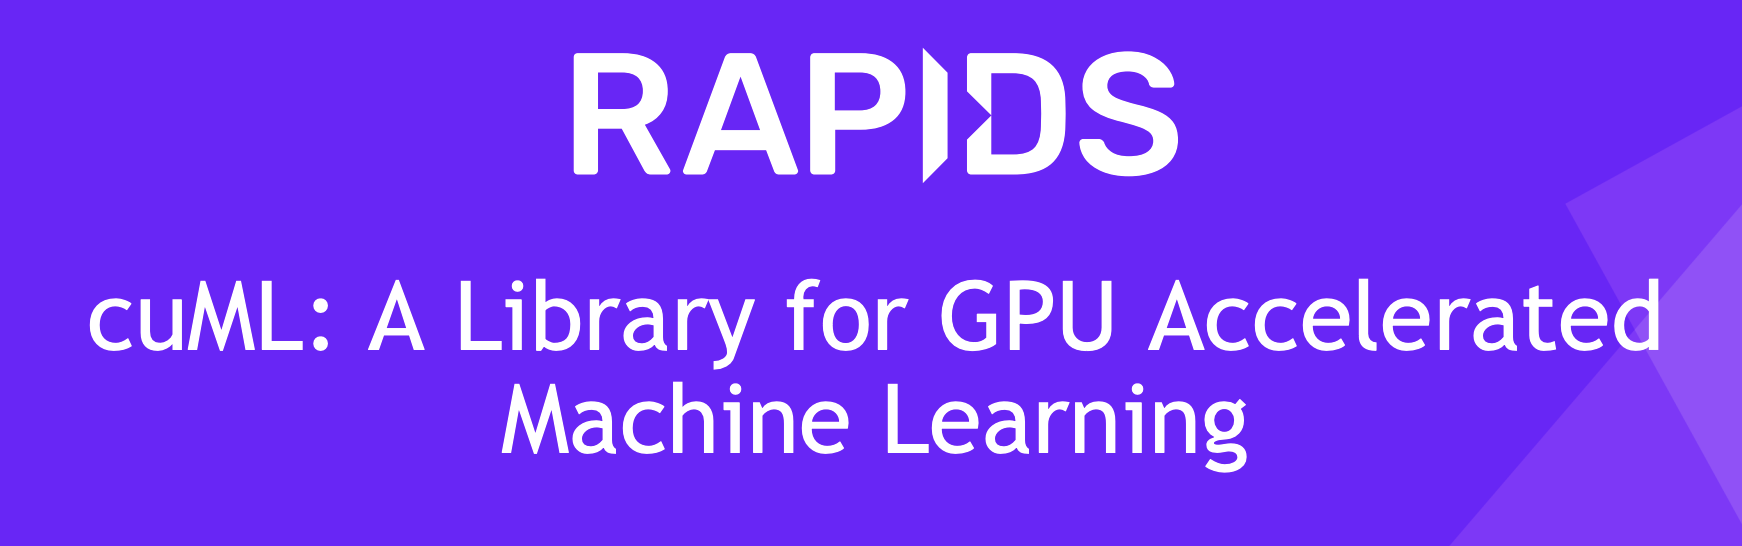




#### Undersampled data

##### SVM with linear hyperparams


In [30]:
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split (X_undersampled , y_undersampled,
                                                    test_size = 0.2,
                                                     random_state = 42)

X_train_undersampled.shape

INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU


(55873, 10)

In [31]:
##trying out the SVM with default hyperparameters
'''
############################### Implementation 3 #########################################
clf1 = cuml.svm.SVC()

voting_clf = VotingClassifier(estimators = [('svc', clf1)])

voting_clf.fit(X_train_undersampled, y_train_undersampled)

y_pred_svm_dh = clf1.predict(X_test_undersampled)


'''
############################################################################################
'''
The slow slugs:
##################################### Implementation 2 #############################################
svc1 = SVC(probability=True, random_state=42)

clf1 = BaggingClassifier(estimator = svc1, n_estimators=10000, bootstrap = False, random_state=42)

clf1.fit(X_train_undersampled, y_train_undersampled)

y_pred_svm_dh = clf1.predict(X_test_undersampled)


##################################### Implementation 1 #############################################
svc1 = SVC(probability=True)


svc1.fit(X_train_undersampled, y_train_undersampled)

y_pred_svm_dh = svc1.predict(X_test_undersampled)
'''

'\nThe slow slugs:\n##################################### Implementation 2 #############################################\nsvc1 = SVC(probability=True, random_state=42)\n\nclf1 = BaggingClassifier(estimator = svc1, n_estimators=10000, bootstrap = False, random_state=42)\n\nclf1.fit(X_train_undersampled, y_train_undersampled)\n\ny_pred_svm_dh = clf1.predict(X_test_undersampled)\n\n\n##################################### Implementation 1 #############################################\nsvc1 = SVC(probability=True)\n\n\nsvc1.fit(X_train_undersampled, y_train_undersampled)\n\ny_pred_svm_dh = svc1.predict(X_test_undersampled)\n'

In [32]:
'''
y_pred_prob_undersampled_svm1 = svc1.predict_proba(X_test_undersampled)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test_undersampled, y_pred_prob_undersampled_svm1)
roc_auc1 = auc(fpr, tpr)
print('AUC score:', roc_auc1)
'''


"\ny_pred_prob_undersampled_svm1 = svc1.predict_proba(X_test_undersampled)[:, 1]  # Probability estimates of the positive class\nfpr, tpr, thresholds = roc_curve(y_test_undersampled, y_pred_prob_undersampled_svm1)\nroc_auc1 = auc(fpr, tpr)\nprint('AUC score:', roc_auc1)\n"

### Naive Bayes

**Gaussian Naive Bayes** is a variant of the Naive Bayes algorithm, which is a probabilistic classification method based on Bayes' theorem. It's particularly useful for classification tasks, especially when dealing with continuous data.

In Gaussian Naive Bayes, the word "Gaussian" refers to the assumption that the features (or attributes) follow a normal (Gaussian) distribution. This assumption simplifies the calculations by assuming that the likelihood of the features belonging to a particular class is normally distributed.

Here's a breakdown of how Gaussian Naive Bayes works:

* **Bayes' Theorem:**
The fundamental principle behind this algorithm is Bayes' theorem, which describes the probability of a hypothesis given the evidence.

Bayes' theorem formula:
P(A∣B)=P(B∣A)×P(A)P(B)P(A∣B)=P(B)P(B∣A)×P(A)​
In the context of classification, it calculates the probability of a class given the data.

* **Independence assumption:**
Naive Bayes assumes that the features are independent of each other given the class. This is a strong and sometimes unrealistic assumption, but it simplifies the calculations significantly. Despite its simplicity, Naive Bayes often performs well in practice.

* **Gaussian distribution assumption:**
Gaussian Naive Bayes assumes that the continuous values associated with each class are distributed according to a Gaussian distribution (also known as a normal distribution). For each feature, it estimates the mean and variance for each class.

* **Training:**
During the training phase, the algorithm calculates the mean and variance of each feature for each class in the dataset.

* **Prediction:**
When a new data point is introduced, the algorithm calculates the probability of the data point belonging to each class using Bayes' theorem and the Gaussian probability density function. The class with the highest probability is considered the most likely class for that data point.
    

In [33]:
gnb = GaussianNB()
gnb.fit(X_train_undersampled, y_train_undersampled)
y_pred_undersampled_gnb = gnb.predict(X_test_undersampled)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


In [34]:
y_pred_prob_gnb = gnb.predict_proba(X_test_undersampled)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test_undersampled, y_pred_prob_gnb)
roc_auc1 = auc(fpr, tpr)

precision_undersampled_gnb = precision_score(y_test_undersampled, y_pred_undersampled_gnb)
recall_undersampled_gnb = recall_score(y_test_undersampled, y_pred_undersampled_gnb)
accuracy_undersampled_gnb = accuracy_score(y_test_undersampled, y_pred_undersampled_gnb)
print(f"Precision : {precision_undersampled_gnb}")
print(f"Recall : {recall_undersampled_gnb}")
print(f"Accuracy : {accuracy_undersampled_gnb}")

print('AUC score:', roc_auc1)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


Precision : 0.7508633448445979
Recall : 0.651076572080422
Accuracy : 0.7163719664972439
AUC score: 0.7770579295479102


#### Conclusion

Put simply, with an AUC score of 0.777, the Naive Bayes model shows predictive ability above chance but may not reach notably high accuracy. However, it is still doing slightly better than Logistic Regression in all aspects

### Gradient Boosting Classifier



a gradient boosted classifier is an ensemble learning method used for classification tasks. It's based on the principle of combining multiple weak learners (usually decision trees) to create a more robust and accurate model.

Here's a breakdown:

Gradient Boosting:

* **Sequential Improvement:** Unlike random forests where trees grow independently, gradient boosting builds trees sequentially. Each tree corrects errors made by the previous ones.

* **Residual Learning:** It focuses on the residuals (the differences between predicted and actual values) in each iteration, making subsequent trees address the mistakes of previous trees.

* **Gradient Descent:** It uses gradient descent optimization to minimize the loss function by adding new models that complement the errors of previous models.

In [35]:
gbc = GradientBoostingClassifier(n_estimators=10, learning_rate=0.5,
                                  max_depth=5, random_state=42)
gbc.fit(X_train_undersampled, y_train_undersampled)
y_pred_undersampled_gbc = gbc.predict(X_test_undersampled)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation.

In [36]:
y_pred_prob_gbc = gbc.predict_proba(X_test_undersampled)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test_undersampled, y_pred_prob_gbc)
roc_auc2 = auc(fpr, tpr)

precision_undersampled_gbc = precision_score(y_test_undersampled, y_pred_undersampled_gbc)
recall_undersampled_gbc = recall_score(y_test_undersampled, y_pred_undersampled_gbc)
accuracy_undersampled_gbc = accuracy_score(y_test_undersampled, y_pred_undersampled_gbc)
print(f"Precision : {precision_undersampled_gbc}")
print(f"Recall : {recall_undersampled_gbc}")
print(f"Accuracy : {accuracy_undersampled_gbc}")

print('AUC score:', roc_auc2)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


Precision : 0.8107872988255763
Recall : 0.7973763011549979
Accuracy : 0.8048536044097645
AUC score: 0.8888707015567163


#### Conclusion

The gradient boost classifier seems to much better than Naive bayes with an AUC score of 0.888

### XGBoost Classifier

XGBoost (Extreme Gradient Boosting) is a powerful and popular machine learning algorithm known for its efficiency and effectiveness in handling structured/tabular data. It belongs to the ensemble learning methods, specifically boosting algorithms, and is widely used in data science competitions and real-world applications due to its accuracy and speed.

Here's a detailed breakdown of XGBoost:

Before diving into XGBoost, let's understand the basics of gradient boosting. Gradient boosting is an ensemble technique where weak learners (usually decision trees) are sequentially added, each one correcting its predecessor's errors. It builds models in a stage-wise fashion, where new models focus on the mistakes made by the previous models. The key principle is to combine multiple weak learners to create a strong learner.

Components of XGBoost:

* **Decision Trees as Base Learners:**
XGBoost employs decision trees as base learners. These trees are usually shallow (not very deep) and are built sequentially.Each subsequent tree aims to correct the errors made by the previous trees.

* **Boosting:** It's a boosting algorithm, which means each tree is built by focusing on the mistakes of the previous trees.Trees are added sequentially, and each new tree attempts to correct the residuals (errors) of the combined ensemble of trees that came before it.

* **Regularization:** XGBoost provides regularization techniques to control overfitting.Regularization terms are added to the objective function, penalizing complex models.

* **Objective Function:** XGBoost optimizes an objective function, which is a combination of a loss function and a regularization term. The objective function measures how well the model fits the data and penalizes complex models.

* **Gradient Descent Algorithm:** XGBoost uses a gradient descent algorithm to minimize the loss when adding new models.It computes gradients of the loss function with respect to the model’s predictions and adjusts subsequent models in the direction that minimizes this loss.

* **Feature Importance:** XGBoost provides a way to calculate feature importance, showing which features have the most influence on the model's predictions. Importance is calculated based on how often each feature is used in the trees and how much it reduces the loss function.

* **Parallel Processing and Tree Pruning:** XGBoost is optimized for speed and efficiency. It can leverage parallel processing and tree pruning techniques to improve performance.

In [37]:
xgbc = XGBClassifier(n_estimators=100, learning_rate=0.1,
                                  max_depth=6, random_state=42)
xgbc.fit(X_train_undersampled, y_train_undersampled)
y_pred_undersampled_xgbc = xgbc.predict(X_test_undersampled)

In [38]:
y_pred_prob_xgbc = xgbc.predict_proba(X_test_undersampled)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test_undersampled, y_pred_prob_xgbc)
roc_auc3 = auc(fpr, tpr)

precision_undersampled_xgbc = precision_score(y_test_undersampled, y_pred_undersampled_xgbc)
recall_undersampled_xgbc = recall_score(y_test_undersampled, y_pred_undersampled_xgbc)
accuracy_undersampled_xgbc = accuracy_score(y_test_undersampled, y_pred_undersampled_xgbc)
print(f"Precision : {precision_undersampled_xgbc}")
print(f"Recall : {recall_undersampled_xgbc}")
print(f"Accuracy : {accuracy_undersampled_xgbc}")

print('AUC score:', roc_auc3)

Precision : 0.8116845462452885
Recall : 0.798374447454727
Accuracy : 0.8057842365237311
AUC score: 0.8908185955811794


#### Conclusion

XGBoost seems to have a slight edge over Gradient Boosting in terms of Precision, Recall, and AUC score. However, the differences are relatively small and might not be significant

### CatBoost

CatBoost integrates various regularization techniques to prevent overfitting and enhance model generalization. Some of these techniques include:

* **Random Permutation:** During training, CatBoost randomly permutes the input data, which helps prevent overfitting by reducing the dependency on the order of the data.
* **Feature Importance:** CatBoost provides insights into feature importance, allowing users to identify the most influential features in the model's predictions.
* **Shrinkage (Learning Rate):** Controlling the learning rate allows CatBoost to adjust the contribution of each tree to the ensemble, preventing the model from fitting the noise in the data too quickly.

In [39]:
cbc = CatBoostClassifier(iterations = 10000, learning_rate=0.5,
                                 depth=2, random_state=42)
cbc.fit(X_train_undersampled, y_train_undersampled)
y_pred_undersampled_cbc = cbc.predict(X_test_undersampled)

0:	learn: 0.5771240	total: 61.3ms	remaining: 10m 12s
1:	learn: 0.5275650	total: 68.3ms	remaining: 5m 41s
2:	learn: 0.4949549	total: 74.5ms	remaining: 4m 8s
3:	learn: 0.4801111	total: 81.6ms	remaining: 3m 23s
4:	learn: 0.4712859	total: 87.9ms	remaining: 2m 55s
5:	learn: 0.4588073	total: 94.6ms	remaining: 2m 37s
6:	learn: 0.4528994	total: 101ms	remaining: 2m 23s
7:	learn: 0.4475752	total: 107ms	remaining: 2m 14s
8:	learn: 0.4448506	total: 114ms	remaining: 2m 6s
9:	learn: 0.4427482	total: 120ms	remaining: 1m 59s
10:	learn: 0.4394880	total: 127ms	remaining: 1m 55s
11:	learn: 0.4378121	total: 133ms	remaining: 1m 51s
12:	learn: 0.4367851	total: 140ms	remaining: 1m 47s
13:	learn: 0.4360118	total: 147ms	remaining: 1m 44s
14:	learn: 0.4347037	total: 154ms	remaining: 1m 42s
15:	learn: 0.4340948	total: 161ms	remaining: 1m 40s
16:	learn: 0.4330585	total: 168ms	remaining: 1m 38s
17:	learn: 0.4326942	total: 174ms	remaining: 1m 36s
18:	learn: 0.4323973	total: 179ms	remaining: 1m 34s
19:	learn: 0.4320

In [40]:
y_pred_prob_cbc = cbc.predict_proba(X_test_undersampled)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test_undersampled, y_pred_prob_cbc)
roc_auc4 = auc(fpr, tpr)

precision_undersampled_cbc = precision_score(y_test_undersampled, y_pred_undersampled_cbc)
recall_undersampled_cbc = recall_score(y_test_undersampled, y_pred_undersampled_cbc)
accuracy_undersampled_cbc = accuracy_score(y_test_undersampled, y_pred_undersampled_cbc)
print(f"Precision : {precision_undersampled_cbc}")
print(f"Recall : {recall_undersampled_cbc}")
print(f"Accuracy : {accuracy_undersampled_cbc}")

print('AUC score:', roc_auc4)

Precision : 0.8047543122191622
Recall : 0.7916726080136889
Accuracy : 0.7989834633832057
AUC score: 0.8817508939899423
